<a href="https://colab.research.google.com/github/anderboni/Projeto-Modulo-01---Bootcamp-Data-Science/blob/main/Projeto_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto do Módulo 1 - Bootcamp Data Science**

*Finalizado em 29/05/2021*

###**Proposta do projeto**: 
<p align = "justify">Análise geral dos dados relativos os gastos hospitalares do SUS; Análise específica dos gastos na Região Sul; Comparativo dos gastos dos três Estados da Região Sul com o número de internações e o número da população.</p>

###**Hipótese**:
<p align = "justify"> O gasto possivelmente aumenta com o tempo, devido ao aumento natural da população, e o gasto guarda também uma proporcionalidade direta com o número de internações nos Estados.</p>



---



#FASE 1

**Procedimentos Hospitalares SUS (por VALOR TOTAL GASTO).** 

<p align = "justify">Iniciamos o projeto com a importação dos dados relativos ao GASTO total por Estado e por Ano/Mês de processamento (período: Janeiro/2008 a Março/2021), obtidos através do sistema TABNET no site do DATASUS.</p>

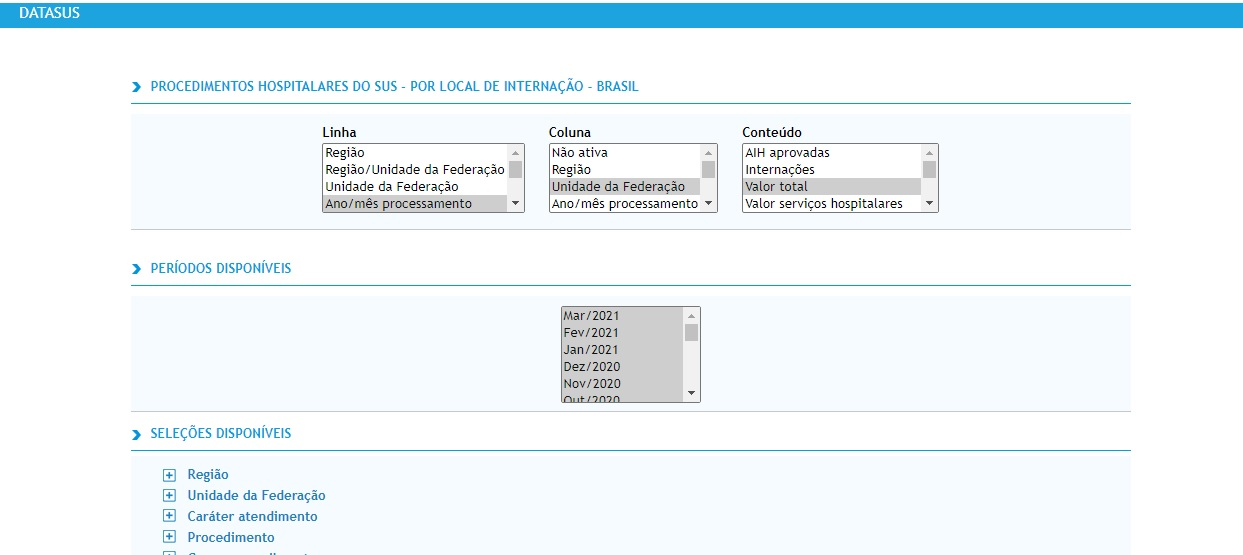

In [41]:
#imagem da tela do TABNET, do DataSus, de onde foram obtidos os dados para a presente análise

from IPython.display import Image

filename = "/content/print_valor_tela.jpg"
Image(filename = filename, width=800, height=600)

In [42]:
#importando bibliotecas 

import pandas as pd
import matplotlib.pyplot as plt

#importando os dados obtidos no TABNET e fazendo a visuaização prévia

gastos = pd.read_csv("/content/A084719189_28_143_208.csv", encoding="ISO-8859-1", skiprows= 3, sep=";", skipfooter=11, thousands=".", decimal=",", engine="python")

gastos.head()

,Ano/mês processamento,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,2008,28678308.60,22365143.69,95655211.98,10983016.60,269639839.22,16355880.94,61946604.58,174304121.61,125324961.56,336173822.14,123103680.55,148131074.59,368178903.99,109226734.11,55438872.28,476204799.63,953038363.13,135886506.76,519987783.20,2039524331.41,658920785.18,332747333.49,631500295.49,107780107.42,104322027.09,241210304.82,139427127.24,8286055941.30
1,..Janeiro/2008,1388528.39,902416.00,4735529.42,657889.53,18864744.11,1120973.34,3441592.69,10723506.39,7985142.43,15539821.90,5947814.08,10723002.45,14393949.89,6243726.32,2780750.11,21211522.47,45671659.76,5456723.98,23025258.52,91678473.48,38266347.46,16504913.45,30931325.46,5377392.11,4795299.01,15310637.29,4745919.19,408424859.23
2,..Fevereiro/2008,2931283.42,1497206.26,7118990.57,777939.31,19553758.20,1268740.33,4985688.85,13559679.41,10079928.25,25735101.55,9509755.83,11386274.47,24181400.95,8376622.16,3676483.16,28189304.95,70194037.10,9102212.86,28394310.93,148677526.82,55384670.52,25651429.11,57363420.01,7002472.61,8684882.23,22258668.68,7632480.67,613174269.21
3,..Março/2008,1541682.52,1794028.48,8196635.49,718688.03,21937342.70,974651.24,6205612.60,13985142.36,10298372.45,28724625.75,10352238.59,12053643.87,29991302.71,8408336.22,5051473.61,34181483.52,79231336.95,10249595.97,44567062.94,156087269.23,53801318.85,26743524.89,51547794.07,8423933.19,7886243.14,21442515.75,9647203.26,664043058.38
4,..Abril/2008,1525314.96,1730469.42,8259378.42,839994.39,20842829.69,1141137.32,4984482.09,14809416.46,10775976.33,30676457.06,10855108.50,12653528.76,34806197.97,9090794.82,5046063.36,39026934.13,77136537.58,11253833.56,44054604.82,161227125.43,52460306.69,27181488.26,56673338.49,8797487.68,8794109.79,20921212.45,11098732.99,686662861.42


In [43]:
#informações sobre os dados
gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ano/mês processamento  174 non-null    object 
 1   RO                     174 non-null    float64
 2   AC                     174 non-null    object 
 3   AM                     174 non-null    float64
 4   RR                     174 non-null    float64
 5   PA                     174 non-null    float64
 6   AP                     174 non-null    float64
 7   TO                     174 non-null    float64
 8   MA                     174 non-null    float64
 9   PI                     174 non-null    float64
 10  CE                     174 non-null    float64
 11  RN                     174 non-null    float64
 12  PB                     174 non-null    float64
 13  PE                     174 non-null    float64
 14  AL                     174 non-null    float64
 15  SE    

In [44]:
#realizando os primeiros ajustes

pd.options.display.float_format = "{:.2f}".format


import numpy as np

gastos.replace("-", np.nan, inplace=True)

gastos["AC"].replace("-", np.nan, inplace=True)
gastos["AC"]= gastos["AC"].astype("float64") #conforme visto acima, no Estado "AC" há um Type "object". Vamos converter para "float"
gastos.head()


,Ano/mês processamento,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,2008,28678308.60,22365143.69,95655211.98,10983016.60,269639839.22,16355880.94,61946604.58,174304121.61,125324961.56,336173822.14,123103680.55,148131074.59,368178903.99,109226734.11,55438872.28,476204799.63,953038363.13,135886506.76,519987783.20,2039524331.41,658920785.18,332747333.49,631500295.49,107780107.42,104322027.09,241210304.82,139427127.24,8286055941.30
1,..Janeiro/2008,1388528.39,902416.00,4735529.42,657889.53,18864744.11,1120973.34,3441592.69,10723506.39,7985142.43,15539821.90,5947814.08,10723002.45,14393949.89,6243726.32,2780750.11,21211522.47,45671659.76,5456723.98,23025258.52,91678473.48,38266347.46,16504913.45,30931325.46,5377392.11,4795299.01,15310637.29,4745919.19,408424859.23
2,..Fevereiro/2008,2931283.42,1497206.26,7118990.57,777939.31,19553758.20,1268740.33,4985688.85,13559679.41,10079928.25,25735101.55,9509755.83,11386274.47,24181400.95,8376622.16,3676483.16,28189304.95,70194037.10,9102212.86,28394310.93,148677526.82,55384670.52,25651429.11,57363420.01,7002472.61,8684882.23,22258668.68,7632480.67,613174269.21
3,..Março/2008,1541682.52,1794028.48,8196635.49,718688.03,21937342.70,974651.24,6205612.60,13985142.36,10298372.45,28724625.75,10352238.59,12053643.87,29991302.71,8408336.22,5051473.61,34181483.52,79231336.95,10249595.97,44567062.94,156087269.23,53801318.85,26743524.89,51547794.07,8423933.19,7886243.14,21442515.75,9647203.26,664043058.38
4,..Abril/2008,1525314.96,1730469.42,8259378.42,839994.39,20842829.69,1141137.32,4984482.09,14809416.46,10775976.33,30676457.06,10855108.50,12653528.76,34806197.97,9090794.82,5046063.36,39026934.13,77136537.58,11253833.56,44054604.82,161227125.43,52460306.69,27181488.26,56673338.49,8797487.68,8794109.79,20921212.45,11098732.99,686662861.42


In [45]:
#ajustando a coluna "Ano/mês processamento" como index

colunas_usaveis = gastos.mean().index.tolist() #o index é uma série imutável, e por isso precisamos adicionar "tolist" para transformar numa lista de python, que é mutável.
colunas_usaveis.insert(0, "Ano/mês processamento")

gastos_usaveis = gastos[colunas_usaveis] #uma variável nova recebendo os dados, para não alterar os anteriores.

gastos_usaveis = gastos_usaveis.set_index("Ano/mês processamento") #indexando

gastos_usaveis.head()

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
Ano/mês processamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,28678308.60,22365143.69,95655211.98,10983016.60,269639839.22,16355880.94,61946604.58,174304121.61,125324961.56,336173822.14,123103680.55,148131074.59,368178903.99,109226734.11,55438872.28,476204799.63,953038363.13,135886506.76,519987783.20,2039524331.41,658920785.18,332747333.49,631500295.49,107780107.42,104322027.09,241210304.82,139427127.24,8286055941.30
..Janeiro/2008,1388528.39,902416.00,4735529.42,657889.53,18864744.11,1120973.34,3441592.69,10723506.39,7985142.43,15539821.90,5947814.08,10723002.45,14393949.89,6243726.32,2780750.11,21211522.47,45671659.76,5456723.98,23025258.52,91678473.48,38266347.46,16504913.45,30931325.46,5377392.11,4795299.01,15310637.29,4745919.19,408424859.23
..Fevereiro/2008,2931283.42,1497206.26,7118990.57,777939.31,19553758.20,1268740.33,4985688.85,13559679.41,10079928.25,25735101.55,9509755.83,11386274.47,24181400.95,8376622.16,3676483.16,28189304.95,70194037.10,9102212.86,28394310.93,148677526.82,55384670.52,25651429.11,57363420.01,7002472.61,8684882.23,22258668.68,7632480.67,613174269.21
..Março/2008,1541682.52,1794028.48,8196635.49,718688.03,21937342.70,974651.24,6205612.60,13985142.36,10298372.45,28724625.75,10352238.59,12053643.87,29991302.71,8408336.22,5051473.61,34181483.52,79231336.95,10249595.97,44567062.94,156087269.23,53801318.85,26743524.89,51547794.07,8423933.19,7886243.14,21442515.75,9647203.26,664043058.38
..Abril/2008,1525314.96,1730469.42,8259378.42,839994.39,20842829.69,1141137.32,4984482.09,14809416.46,10775976.33,30676457.06,10855108.50,12653528.76,34806197.97,9090794.82,5046063.36,39026934.13,77136537.58,11253833.56,44054604.82,161227125.43,52460306.69,27181488.26,56673338.49,8797487.68,8794109.79,20921212.45,11098732.99,686662861.42


In [46]:
#média dos gastos por Estado com os dados ajustados
gastos_usaveis.mean()

RO        17179504.39
AC         7804309.78
AM        33055998.90
RR         5670292.50
PA        81126017.28
AP         5342415.39
TO        17586694.36
MA        66742577.55
PI        39325669.01
CE       113652356.04
RN        45864172.88
PB        45084811.11
PE       147951551.31
AL        38558886.25
SE        20962983.02
BA       168819682.25
MG       352047198.91
ES        58721563.77
RJ       178230882.15
SP       713734556.97
PR       253129563.91
SC       135086399.37
RS       220075710.00
MS        40078018.90
MT        37588272.09
GO        85751269.20
DF        44696945.75
Total   2973823450.67
dtype: float64

In [47]:
#removendo o campo TOTAL das linhas e das colunas, para então plotar o gráfico

gastos_usaveis = gastos_usaveis.drop("Total", axis=1) #eixo da linha
gastos_usaveis = gastos_usaveis.drop("Total", axis=0) #eixo da coluna
gastos_usaveis.head()

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
Ano/mês processamento,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,28678308.60,22365143.69,95655211.98,10983016.60,269639839.22,16355880.94,61946604.58,174304121.61,125324961.56,336173822.14,123103680.55,148131074.59,368178903.99,109226734.11,55438872.28,476204799.63,953038363.13,135886506.76,519987783.20,2039524331.41,658920785.18,332747333.49,631500295.49,107780107.42,104322027.09,241210304.82,139427127.24
..Janeiro/2008,1388528.39,902416.00,4735529.42,657889.53,18864744.11,1120973.34,3441592.69,10723506.39,7985142.43,15539821.90,5947814.08,10723002.45,14393949.89,6243726.32,2780750.11,21211522.47,45671659.76,5456723.98,23025258.52,91678473.48,38266347.46,16504913.45,30931325.46,5377392.11,4795299.01,15310637.29,4745919.19
..Fevereiro/2008,2931283.42,1497206.26,7118990.57,777939.31,19553758.20,1268740.33,4985688.85,13559679.41,10079928.25,25735101.55,9509755.83,11386274.47,24181400.95,8376622.16,3676483.16,28189304.95,70194037.10,9102212.86,28394310.93,148677526.82,55384670.52,25651429.11,57363420.01,7002472.61,8684882.23,22258668.68,7632480.67
..Março/2008,1541682.52,1794028.48,8196635.49,718688.03,21937342.70,974651.24,6205612.60,13985142.36,10298372.45,28724625.75,10352238.59,12053643.87,29991302.71,8408336.22,5051473.61,34181483.52,79231336.95,10249595.97,44567062.94,156087269.23,53801318.85,26743524.89,51547794.07,8423933.19,7886243.14,21442515.75,9647203.26
..Abril/2008,1525314.96,1730469.42,8259378.42,839994.39,20842829.69,1141137.32,4984482.09,14809416.46,10775976.33,30676457.06,10855108.50,12653528.76,34806197.97,9090794.82,5046063.36,39026934.13,77136537.58,11253833.56,44054604.82,161227125.43,52460306.69,27181488.26,56673338.49,8797487.68,8794109.79,20921212.45,11098732.99


In [48]:
#selecionando os anos inteiros (consideramos aqui os dados de 2008 até 2020, pois 2021 não está completo)

anos_filtrados = ["2008", "2009", "2010", "2011", "2012", "2013", 
                    "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
gastos_usaveis = gastos_usaveis.loc[anos_filtrados]

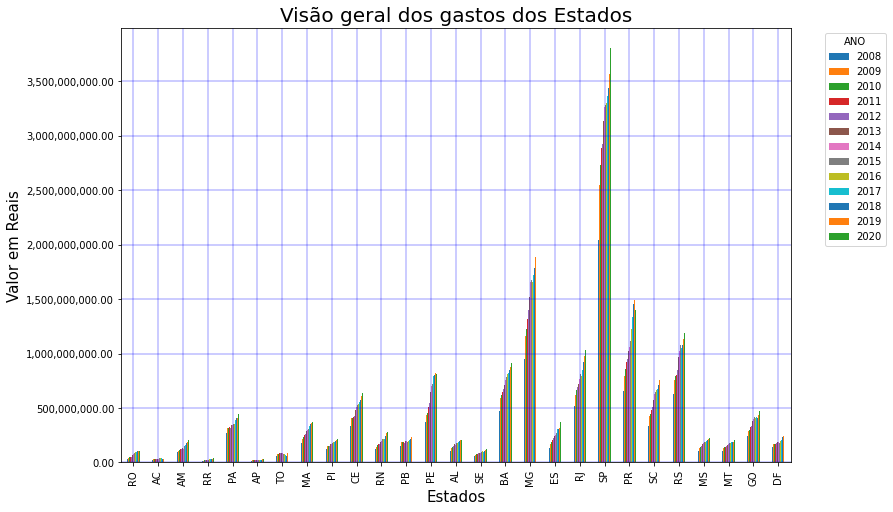

In [49]:
#plotando o primeiro gráfico, com todos os dados

import matplotlib.ticker as ticker


ax = gastos_usaveis.T.plot(kind="bar", figsize=(12,8))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #ajustando o formato dos números do eixo Y

plt.title("Visão geral dos gastos dos Estados", fontsize=20)
plt.xlabel("Estados", fontsize=15)
plt.ylabel("Valor em Reais", fontsize=15)
plt.legend(title="ANO", bbox_to_anchor = (1.15, 1), frameon=True)
plt.grid(color='b', linestyle='-', linewidth=0.4)
plt.show() 

<p align = "justify">Analisando rapidamente o gráfico acima, é possível verificar que, de maneira geral, os gastos aumentaram em praticamente todos os Estados ao longo dos anos.</p> 

<p align = "justify">Ressalta-se que o referido gráfico não é o ideal, pois contempla muitos dados, dififultando a visualização. Outras análises mais específicas serão realizadas ao longo deste projeto.</p>

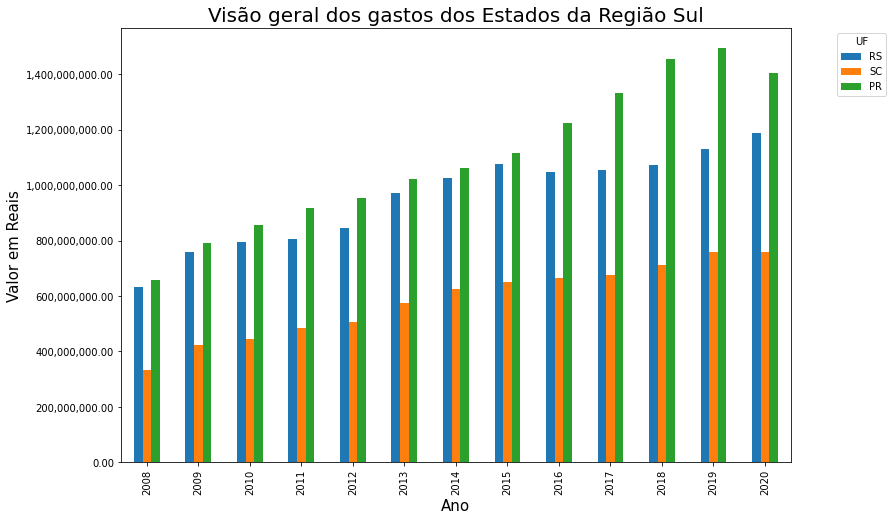

In [50]:
#plotando o gráfico apenas da Região SUL

ax = gastos_usaveis[["RS", "SC", "PR"]].plot(kind="bar", figsize=(12,8))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #ajustando o formato dos números do eixo Y

plt.title("Visão geral dos gastos dos Estados da Região Sul", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("Valor em Reais", fontsize=15)
plt.legend(title="UF", bbox_to_anchor = (1.15, 1), frameon=True)
plt.show() 

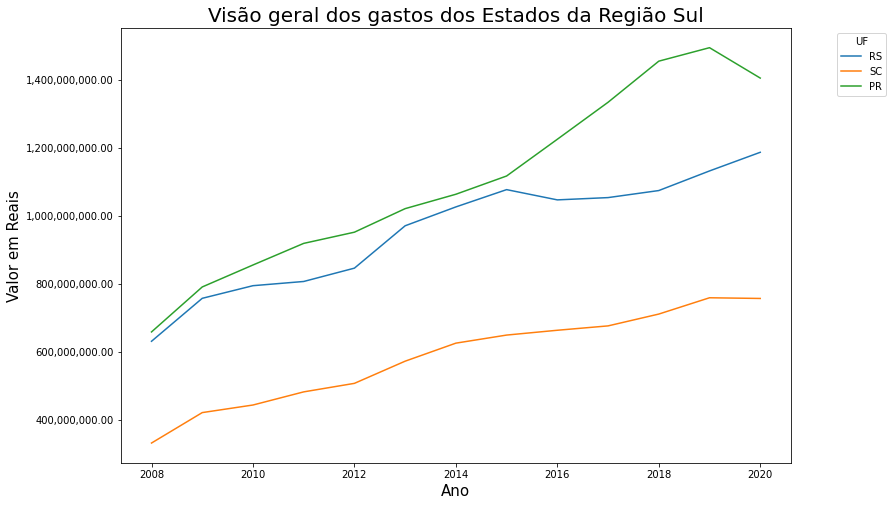

In [51]:
#plotando o mesmo gráfico acima, apenas da Região SUL, porém de linhas

ax = gastos_usaveis[["RS", "SC", "PR"]].plot(figsize=(12,8))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #ajustando o formato dos números do eixo Y

plt.title("Visão geral dos gastos dos Estados da Região Sul", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("Valor em Reais", fontsize=15)
plt.legend(title="UF", bbox_to_anchor = (1.15, 1), frameon=True)
plt.show() 

<p align = "justify">Conforme os dois gráficos acima, verificamos que o Paraná é campeão de gastos em todos os anos. Em segundo lugar vem o RS e, por fim, SC.</p> 

<p align = "justify">Nota-se que o RS e o PR possuem gastos muito similares de 2008 até meados de 2015, quando então se distanciam. Isso é mais perceptível no segundo gráfico.</p> 

<p align = "justify">Deve-se destacar também a queda ascentuada dos gastos do Paraná no último ano, aproximando-se dos gastos do RS, que mantêm-se em elevação. Quanto a SC, observa-se uma certa estabilização no último ano analisado.</p>

In [52]:
#tabela de comparação com base no RS

gastos_usaveis.T / gastos_usaveis.T.loc["RS"]

Ano/mês processamento,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
RO,0.05,0.06,0.07,0.07,0.06,0.07,0.08,0.08,0.09,0.09,0.10,0.10,0.09
AC,0.04,0.04,0.04,0.04,0.04,0.03,0.04,0.03,0.04,0.04,0.03,0.03,0.03
AM,0.15,0.14,0.14,0.15,0.15,0.13,0.12,0.14,0.14,0.15,0.16,0.17,0.18
RR,0.02,0.02,0.03,0.02,0.03,0.02,0.02,0.02,0.03,0.03,0.03,0.03,0.03
PA,0.43,0.42,0.40,0.40,0.37,0.35,0.33,0.33,0.34,0.37,0.38,0.36,0.38
AP,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.02
TO,0.10,0.10,0.10,0.10,0.10,0.09,0.09,0.07,0.07,0.07,0.06,0.07,0.07
MA,0.28,0.28,0.30,0.31,0.31,0.30,0.29,0.29,0.29,0.32,0.33,0.32,0.32
PI,0.20,0.19,0.19,0.18,0.18,0.17,0.16,0.16,0.18,0.18,0.18,0.18,0.18
CE,0.53,0.54,0.52,0.52,0.50,0.49,0.50,0.49,0.52,0.52,0.53,0.54,0.54


<p align = "justify">Na tabela acima podemos visualiar o gasto comparativo tomando por base o Estado do RS.</p>

<p align = "justify">É possível verificar qual Estado gastou mais (maior do que 1.00) ou menos (menor do que 1.00), dentro do respectivo ano.</p>

In [53]:
#incluindo novamente a "coluna" TOTAL em uma nova variável e ordeando do maior para o menor

ordenado_total_ano = gastos_usaveis["Total"] = gastos_usaveis.sum(axis=1) 
ordenado_total_ano = gastos_usaveis.sort_values("Total", ascending=False)
ordenado_total_ano.head(13)

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
Ano/mês processamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,109157714.48,40018213.54,210212793.77,36868427.83,446873379.68,27872333.42,78106310.96,374831469.05,216325418.88,636041627.87,283130286.76,227945019.74,814038126.07,205569621.04,120241590.98,914262558.89,1897579732.49,370259514.46,1032735829.01,3804311250.83,1404273584.36,757229671.03,1186359968.71,228510725.41,204747491.34,471567373.98,265391022.65,16364461057.23
2019,109113101.49,34709598.96,189256198.89,34320141.86,410805540.79,29370406.98,82314133.11,366407811.12,206820114.53,607937295.27,266652744.15,232234991.55,819736634.40,204786689.26,117487663.63,879675393.50,1889157110.44,319947622.99,976876703.73,3567637040.10,1493484390.79,759243377.08,1131618227.23,218562922.14,189645101.04,438382657.52,239866880.34,15816050492.89
2018,102091843.39,34432565.81,175744827.43,33851454.13,410173716.47,25843955.47,62982094.00,351572006.86,195934078.96,573956797.72,240919860.46,218267536.76,800658730.01,201009115.58,107312506.79,845519121.44,1790290126.08,303425629.23,918095799.51,3442007311.77,1453914663.28,711391945.08,1074036199.48,201939866.02,190680812.60,407220316.61,233115326.12,15106388207.06
2017,95261076.71,37245525.42,160820207.41,31338348.90,388952636.23,22366616.97,72772161.78,333689604.72,186604619.98,551317375.87,218447439.60,208882120.74,792199747.81,191840311.19,99807105.65,821240562.79,1718544163.79,309155832.58,853543221.39,3361179945.39,1333212214.45,676676323.29,1053347905.55,194544177.74,185882129.14,414555691.08,205151092.15,14518578158.32
2016,91955338.88,40487149.58,147812237.69,29133807.87,357148898.98,21916972.06,78034121.80,307485045.93,188677491.61,540114355.29,212854443.28,192764395.74,733193554.40,177582559.02,102263264.46,810137241.08,1657939988.05,296978830.46,790282302.29,3305056173.67,1224621412.80,663853492.72,1046635638.70,190977047.16,181948081.80,410610981.83,200638650.79,14001103477.94
2015,86163443.56,37262018.93,151278739.06,24556486.66,353977050.33,22053145.67,78227511.70,311541016.04,174857185.86,527062987.37,210853738.06,189634905.54,717003467.19,177761701.65,96666330.17,785597108.46,1674939603.04,267235078.66,814738275.82,3285221792.79,1116764284.11,649716373.14,1076735540.93,186415626.22,173915288.36,420280242.13,177523900.39,13787982841.84
2014,79095836.74,36039320.36,121900696.54,19757952.27,342851637.96,23354262.75,88436272.97,301805294.56,164802466.18,510177372.22,193227602.99,194470103.49,703527971.01,163585154.41,83949080.41,757704806.91,1658840666.80,253097937.91,765976172.49,3268008800.52,1063177083.80,626008038.37,1025980732.27,174087791.31,164696707.99,400943736.86,184904125.57,13370407625.66
2013,66472516.81,33605893.87,129056584.80,21540894.01,340687749.39,24101437.86,89125614.87,287730036.64,165825709.14,477905999.53,184889611.50,196189793.35,645113247.98,169991894.11,86017057.89,712401313.44,1517973272.78,238504840.47,718419831.03,3137331779.16,1020930795.65,573083638.11,970603274.07,168376595.75,156755385.20,378866106.13,186859044.16,12698359917.70
2012,51181258.99,32929373.49,124449598.86,21279908.04,315536309.93,23197926.19,86534591.54,260168410.88,150000009.87,426195922.41,172064943.34,180091112.57,541989486.37,148620456.33,83200215.20,673849510.16,1402515081.39,220412665.91,689807509.04,2928498621.81,951800112.02,507951182.58,846224368.71,152577852.42,149618209.33,336047814.62,179378869.77,11656121321.77


<p align = "justify">Com o auxílio da tabela acima podemos verificar que os gastos estão crescendo anualmente, de maneira geral, pois não estamos analisando, nesse ponto, a situação específica de cada Estado.</p>

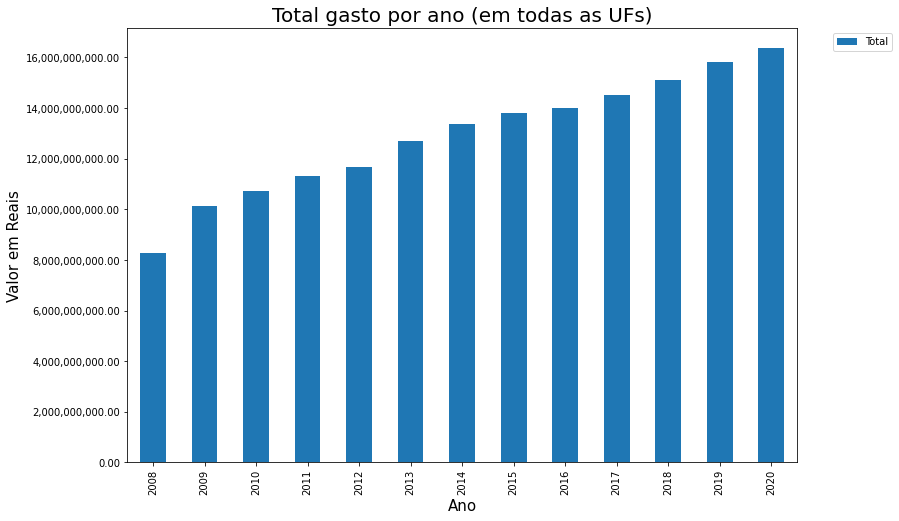

In [54]:
#plotando o gráfico de total gasto por ano em todas as UF's

ax = gastos_usaveis["Total"].plot(kind="bar", figsize=(12,8))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #ajustando o formato dos números do eixo Y

plt.title("Total gasto por ano (em todas as UFs)", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("Valor em Reais", fontsize=15)
plt.legend(bbox_to_anchor = (1.15, 1), frameon=True)
plt.show() 

<p align = "justify">Com este último gráfco torna-se mais perceptível o aumento geral de gastos com o passar dos anos. Resta saber se esse aumento é, de fato, decorrente apenas do aumento das internações, o que, por sua vez, pode ser gerado pela aumento da população.</p>

In [55]:
#visão geral da Região Sul, com os números ainda ordenados por total

ordenado_total_ano[["RS", "SC", "PR"]]

,RS,SC,PR
Ano/mês processamento,,,
2020,1186359968.71,757229671.03,1404273584.36
2019,1131618227.23,759243377.08,1493484390.79
2018,1074036199.48,711391945.08,1453914663.28
2017,1053347905.55,676676323.29,1333212214.45
2016,1046635638.70,663853492.72,1224621412.80
2015,1076735540.93,649716373.14,1116764284.11
2014,1025980732.27,626008038.37,1063177083.80
2013,970603274.07,573083638.11,1020930795.65
2012,846224368.71,507951182.58,951800112.02


<p align = "justify">Visualizando acima apenas os dados da Região Sul.</p>



---



#FASE 2

**Procedimentos Hospitalares SUS (por local de internação).**

<p align = "justify">Dados igualmente obtidos do sistema TABNET, do Datasus, conforme configuração exibida na tela abaixo.</p>

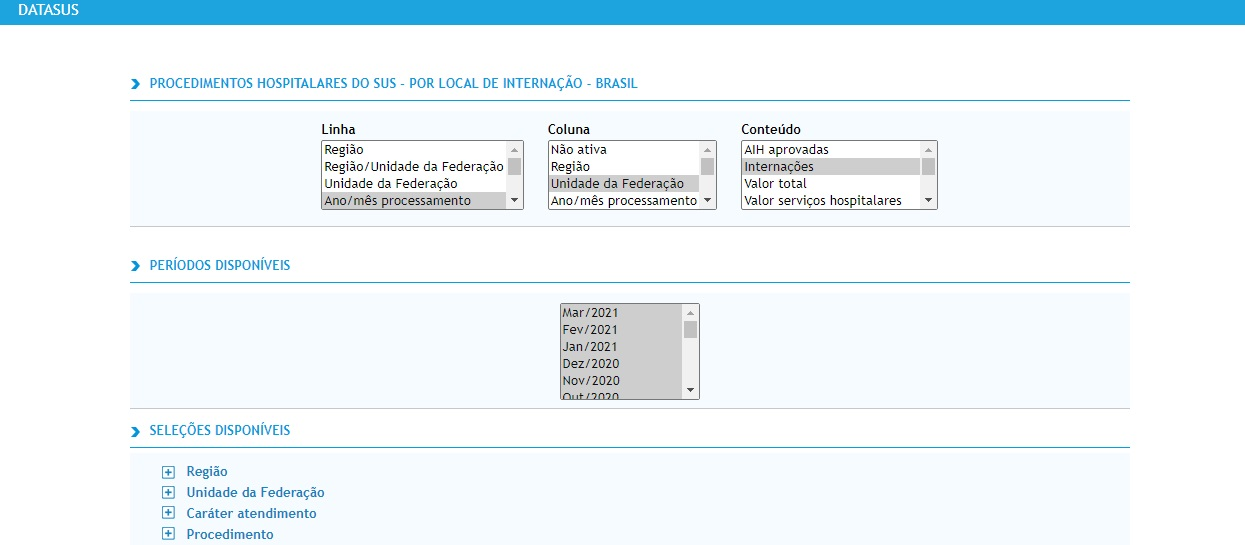

In [56]:
filename = "/content/print_tela_internacoes.jpg"
Image(filename = filename, width=800, height=600)

In [57]:
#bibliotecas já importadas anteriormente
#importando os dados obtidos no TABNET e fazendo a visuaização prévia

internacoes = pd.read_csv("/content/A085458189_28_143_208.csv", encoding="ISO-8859-1", skiprows= 3, sep=";", skipfooter=11, thousands=".", decimal=",")

internacoes.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Ano/mês processamento,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,2008,71821,46087,163791,24703,509338,31564,98328,327886,226411,480561,161087,223474,489817,178029,99590,829707,1124789,178076,629592,2162155,729514,369749,712789,150921,173159,362648,188017,10743603
1,..Janeiro/2008,4142,2087,9325,1475,38628,2386,6665,21417,15878,29823,9916,17126,25390,12168,5832,41659,67509,9502,34859,125361,51180,23728,41729,9636,9975,26465,7754,651615
2,..Fevereiro/2008,7301,3071,12754,1812,41530,2650,7638,25681,18994,39604,12779,17409,35496,14315,7015,51637,89738,12962,37109,155799,61926,30418,64477,11206,14329,34641,12057,824348
3,..Março/2008,4318,3783,14780,1813,42790,2262,9491,26368,18383,42328,14022,19013,40756,13861,8804,59728,96161,15098,57367,169738,63178,30982,61229,12012,14124,32161,14746,889296
4,..Abril/2008,4285,3737,14556,1964,41112,2259,8330,28277,18909,44200,14067,19821,45354,15975,9035,74525,93949,15108,51389,178746,60734,30729,64063,12609,14822,32994,14754,916303


In [58]:
#informações sobre os dados
internacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Ano/mês processamento  174 non-null    object
 1   RO                     174 non-null    int64 
 2   AC                     174 non-null    object
 3   AM                     174 non-null    int64 
 4   RR                     174 non-null    int64 
 5   PA                     174 non-null    int64 
 6   AP                     174 non-null    int64 
 7   TO                     174 non-null    int64 
 8   MA                     174 non-null    int64 
 9   PI                     174 non-null    int64 
 10  CE                     174 non-null    int64 
 11  RN                     174 non-null    int64 
 12  PB                     174 non-null    int64 
 13  PE                     174 non-null    int64 
 14  AL                     174 non-null    int64 
 15  SE                     

In [59]:
#ajustando a coluna "Ano/mês processamento" como index

colunas_usaveis = internacoes.mean().index.tolist() #o index é uma série imutável, e por isso precisamos adicionar "tolist" para transformar numa lista de python, que é mutável.
colunas_usaveis.insert(0, "Ano/mês processamento")

internacoes_usaveis = internacoes[colunas_usaveis] #uma variável nova recebendo os dados, para não alterar os anteriores.

internacoes_usaveis = internacoes_usaveis.set_index("Ano/mês processamento") #indexando

internacoes_usaveis.head()

,RO,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
Ano/mês processamento,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,71821,163791,24703,509338,31564,98328,327886,226411,480561,161087,223474,489817,178029,99590,829707,1124789,178076,629592,2162155,729514,369749,712789,150921,173159,362648,188017,10743603
..Janeiro/2008,4142,9325,1475,38628,2386,6665,21417,15878,29823,9916,17126,25390,12168,5832,41659,67509,9502,34859,125361,51180,23728,41729,9636,9975,26465,7754,651615
..Fevereiro/2008,7301,12754,1812,41530,2650,7638,25681,18994,39604,12779,17409,35496,14315,7015,51637,89738,12962,37109,155799,61926,30418,64477,11206,14329,34641,12057,824348
..Março/2008,4318,14780,1813,42790,2262,9491,26368,18383,42328,14022,19013,40756,13861,8804,59728,96161,15098,57367,169738,63178,30982,61229,12012,14124,32161,14746,889296
..Abril/2008,4285,14556,1964,41112,2259,8330,28277,18909,44200,14067,19821,45354,15975,9035,74525,93949,15108,51389,178746,60734,30729,64063,12609,14822,32994,14754,916303


In [60]:
#média das internações por Estado com os dados ajustados
internacoes_usaveis.mean()

RO        23916.21
AM        38771.62
RR         8034.29
PA       111708.19
AP         8252.90
TO        20298.67
MA        92661.29
PI        49515.31
CE       109328.95
RN        37801.93
PB        44796.57
PE       120816.09
AL        38594.67
SE        21110.59
BA       187824.71
MG       268303.10
ES        49944.98
RJ       150101.31
SP       537073.57
PR       178484.72
SC        98762.62
RS       167384.86
MS        36858.52
MT        41747.57
GO        78142.40
DF        44122.59
Total   2575342.17
dtype: float64

In [61]:
#removendo o campo TOTAL das linhas e das colunas, para então plotar o gráfico

internacoes_usaveis = internacoes_usaveis.drop("Total", axis=1) #eixo da linha
internacoes_usaveis = internacoes_usaveis.drop("Total", axis=0) #eixo da coluna
internacoes_usaveis.head()

,RO,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
Ano/mês processamento,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,71821,163791,24703,509338,31564,98328,327886,226411,480561,161087,223474,489817,178029,99590,829707,1124789,178076,629592,2162155,729514,369749,712789,150921,173159,362648,188017
..Janeiro/2008,4142,9325,1475,38628,2386,6665,21417,15878,29823,9916,17126,25390,12168,5832,41659,67509,9502,34859,125361,51180,23728,41729,9636,9975,26465,7754
..Fevereiro/2008,7301,12754,1812,41530,2650,7638,25681,18994,39604,12779,17409,35496,14315,7015,51637,89738,12962,37109,155799,61926,30418,64477,11206,14329,34641,12057
..Março/2008,4318,14780,1813,42790,2262,9491,26368,18383,42328,14022,19013,40756,13861,8804,59728,96161,15098,57367,169738,63178,30982,61229,12012,14124,32161,14746
..Abril/2008,4285,14556,1964,41112,2259,8330,28277,18909,44200,14067,19821,45354,15975,9035,74525,93949,15108,51389,178746,60734,30729,64063,12609,14822,32994,14754


In [62]:
#selecionando os anos inteiros (consideramos aqui os dados de 2008 até 2020, pois 2021 não está completo)

internacoes_usaveis = internacoes_usaveis.loc[anos_filtrados] #mantivemos a variável "anos_filtrados" já utilizada anteriormente, pois os anos a serem analisados são os mesmos

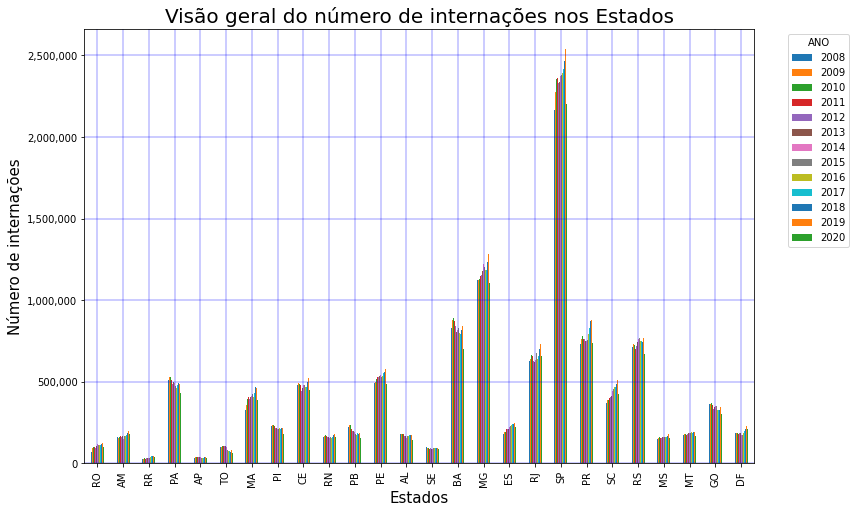

In [63]:
#plotando o primeiro gráfico, com todos os dados

#biblioteca já importada anteriormente


ax = internacoes_usaveis.T.plot(kind="bar", figsize=(12,8))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #ajustando o formato dos números do eixo Y

plt.title("Visão geral do número de internações nos Estados", fontsize=20)
plt.xlabel("Estados", fontsize=15)
plt.ylabel("Número de internações", fontsize=15)
plt.legend(title="ANO", bbox_to_anchor = (1.15, 1), frameon=True)
plt.grid(color='b', linestyle='-', linewidth=0.4)
plt.show() 

<p align = "justify">Olhando o gráfico acima, em uma primeira análise, é possível perceber grandes semelhanças com o gráfico plotado anteriormente para para o Valor de Gastos dos Estados, levando a uma interpretação preliminar de que os gastos acompanham o número de internações nos Estados alvos da análise. Entretanto, é igualmente perceptível certa variação na distribuição dos números de internações nos Estados relativos aos anos em tela. Sendo assim, é importante nesse momento mencionar essa diferença, que, em resumo, nos leva a interpretar que o total de internações nos Estados (neste gráfico) pode ser semalhante ao total de gastos nos Estados (gráfico da FASE 1), porém, ao olhar com maior atenção a distribuição no que tange aos anos, percebemos certas diferenças no quesito internações X gastos, pois o "número de internações por ano" não obedece o mesmo padrão do "número de gastos" por ano. </p> 

<p align = "justify">Destacamos que o Estado do Acre (AC) não consta nesse dataset, e por esse motivo não aparece no gráfico.</p>

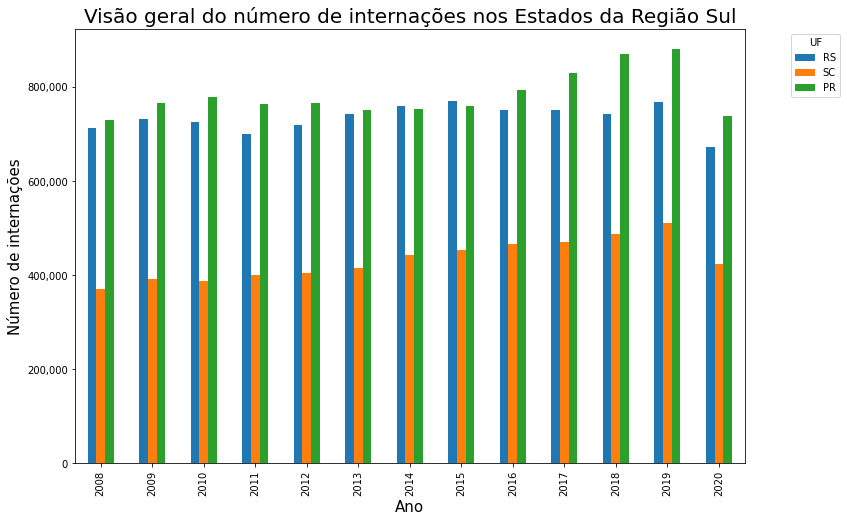

In [64]:
#plotando o gráfico apenas da Região SUL

ax = internacoes_usaveis[["RS", "SC", "PR"]].plot(kind="bar", figsize=(12,8))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #ajustando o formato dos números do eixo Y

plt.title("Visão geral do número de internações nos Estados da Região Sul", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("Número de internações", fontsize=15)
plt.legend(title="UF", bbox_to_anchor = (1.15, 1), frameon=True)
plt.show() 

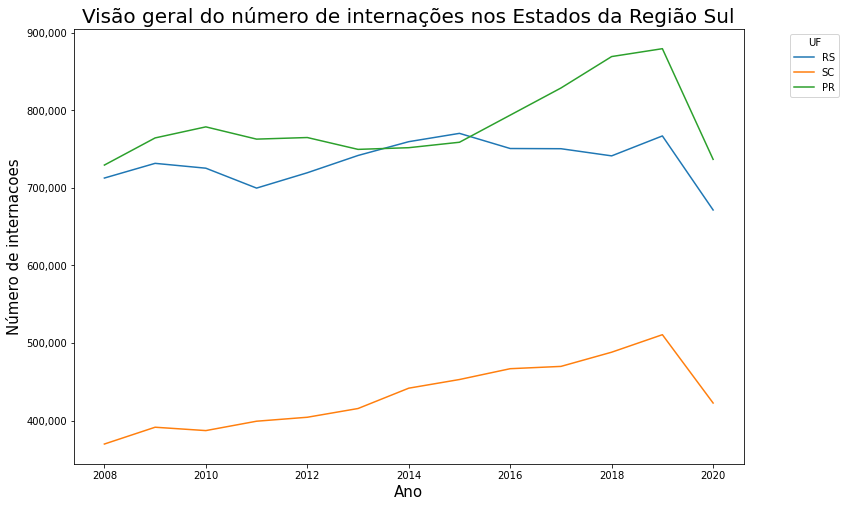

In [65]:
#plotando o mesmo gráfico acima, apenas da Região SUL, porém de linhas

ax = internacoes_usaveis[["RS", "SC", "PR"]].plot(figsize=(12,8))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #ajustando o formato dos números do eixo Y

plt.title("Visão geral do número de internações nos Estados da Região Sul", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("Número de internacoes", fontsize=15)
plt.legend(title="UF", bbox_to_anchor = (1.15, 1), frameon=True)
plt.show() 

<p align = "justify">Há semelhanças com o mesmo gráfico analisado anteriormente, na FASE 1, para os gastos nos Estados da Região Sul. Os gastos de maneira geral acompanham o número de internações nos três Estados alvos da análise, o que de certo forma já era esperado. Porém, por volta do anos 2014 a 2015, é possível perceber o número de internações no RS superando o número de internações no PR, por breve período, o que é curioso, pois nesse mesmo período o gasto do PR era superior ao do RS (não muito, mas era), conforme visto nos gráficos anteriores. Seria importante investigar a razão dessa inversão.</p>

<p align = "justify">Chamamos a atenção para a queda expressiva nos três Estados, a partir de 2019 ou início de 2020 (data precisa a ser verificada).</p> 

**HIPÓTESE:** 
<p align = "justify">Esta queda repentina seria em decorrência do aumento de internações reltivas ao covid-19, que provavelmente não estão contempladas nos dados obtidos para esta análise? Essa hipótese é provável, uma vez que, aumentando os leitos disponíveis para covid-19, diminui-se os leitos disponíveis para os demais tratamentos. Outra questão seria a diminuição da circulação de pessoas devido ao confinamento, o que acarretaria em redução de internações por outras doenças típicas.</p> 

In [66]:
#tabela de comparação com base no RS

internacoes_usaveis.T / internacoes_usaveis.T.loc["RS"]

Ano/mês processamento,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
RO,0.10,0.13,0.14,0.14,0.13,0.14,0.15,0.14,0.15,0.15,0.16,0.16,0.15
AM,0.23,0.21,0.22,0.24,0.23,0.23,0.20,0.22,0.22,0.23,0.25,0.26,0.27
RR,0.03,0.04,0.04,0.04,0.04,0.05,0.04,0.05,0.05,0.06,0.06,0.06,0.06
PA,0.71,0.72,0.73,0.73,0.68,0.67,0.65,0.61,0.62,0.64,0.67,0.63,0.64
AP,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.05,0.05,0.05
TO,0.14,0.14,0.14,0.15,0.15,0.14,0.14,0.11,0.10,0.10,0.09,0.11,0.10
MA,0.46,0.49,0.55,0.58,0.55,0.55,0.55,0.55,0.54,0.58,0.63,0.60,0.58
PI,0.32,0.32,0.33,0.32,0.30,0.30,0.28,0.27,0.29,0.28,0.29,0.29,0.27
CE,0.67,0.68,0.67,0.69,0.62,0.63,0.63,0.62,0.63,0.63,0.67,0.69,0.67
RN,0.23,0.23,0.24,0.24,0.23,0.22,0.21,0.21,0.21,0.22,0.23,0.24,0.24


<p align = "justify">Na tabela acima podemos visualiar o gasto comparativo tomando por base o Estado do RS.</p> 

<p align = "justify">É possível verificar qual Estado gastou mais (maior do que 1.00) ou menos (menor do que 1.00).</p>

In [67]:
#incluindo novamente a "coluna" TOTAL em uma nova variável e ordeando do maior para o menor

ordenado_total_ano = internacoes_usaveis["Total"] = internacoes_usaveis.sum(axis=1) 
ordenado_total_ano = internacoes_usaveis.sort_values("Total", ascending=False)
ordenado_total_ano.head(13)

,RO,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
Ano/mês processamento,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019,122900,196792,44672,484950,40876,81159,461473,219187,525966,182974,188246,579057,171660,94355,842569,1283580,246301,730779,2537199,879614,510756,767093,177302,195153,342936,229614,12137163
2018,119878,184790,43745,493920,38012,68011,466899,216767,499463,172367,183311,559226,172327,94259,819187,1236742,242267,700376,2465311,869464,488185,741387,167575,190111,326510,211940,11772030
2017,113432,175069,43658,480382,33608,76420,434037,209821,469258,161793,183532,556817,171817,91872,793396,1187911,241093,656151,2417180,828899,469868,750611,163616,189403,329738,196477,11425859
2015,111558,168896,34834,471753,34652,82858,423439,210171,478707,160249,179866,532148,166343,95148,830377,1202583,227891,678482,2381371,758953,452952,770416,164119,187635,351023,172093,11328517
2010,100265,160880,31199,528520,36584,104039,396170,236534,489136,172761,235608,517767,179644,93575,890115,1129845,194424,666471,2351919,778787,387083,725490,164050,181009,371616,184787,11308278
2014,116066,152568,30329,490632,36849,102788,415665,208979,479365,158346,191084,540616,157005,88569,819507,1223629,221146,635657,2372545,751930,441783,759693,161552,185150,349728,176373,11267554
2016,111299,166305,40269,463631,32653,78529,405325,217161,471118,157770,176365,535647,168501,94334,799999,1182982,232395,639101,2393286,793912,466898,750868,163198,192471,328457,186203,11248677
2011,98808,167585,27269,511097,37015,107184,404317,226677,482239,170954,212369,527844,179336,90741,872513,1150138,211434,657720,2363232,762982,399178,699817,156357,174177,355192,183178,11229353
2013,107322,167015,33884,498765,38215,105152,408828,219884,464878,162820,197650,535716,166864,89071,806999,1180606,211714,618799,2337825,749755,415552,741882,164672,184513,348103,189163,11145647


<p align = "justify">A tabela acima desperta curiosidade, pois se comporta de maneira diferente do esperado no inicio do estudo. Ela leva em conta o gasto TOTAL por ANO, somados todos os ESTADO, e a partir disso é possível verificar que o número de internações não cresce de forma linear, mas oscila com o passar do tempo. Vale lembrar que esta tendência para as internações por ano já havia sido detectada nos gráficos anteriores, entretanto, neste atual gráfico, o fenômeno é mais perceptível.</p> 

<p align = "justify">Outro fato curioso, mas já verificado anteriormente, é que o ano de 2020 teve menor número de internações dentre os analisados. A hipótese disso ocorrer em razão do covid-19, já explanado anteriormente, se fortalece.</p>

<p align = "justify">Ressalta-se que a presente tabela está ordenada de forma decrescente.</p>


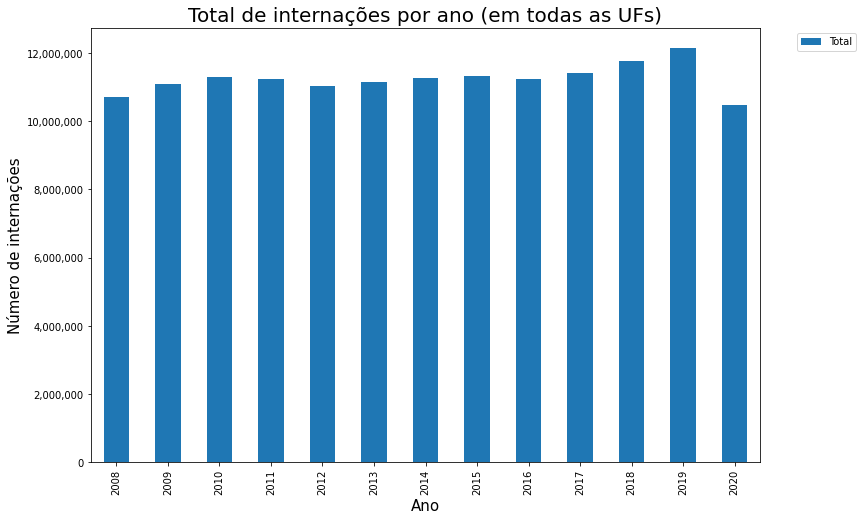

In [68]:
#plotando o gráfico do total de internações por ano em todas as UF's

ax = internacoes_usaveis["Total"].plot(kind="bar", figsize=(12,8))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #ajustando o formato dos números do eixo Y

plt.title("Total de internações por ano (em todas as UFs)", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("Número de internações", fontsize=15)
plt.legend(bbox_to_anchor = (1.15, 1), frameon=True)
plt.show() 

<p align = "justify">Com o gráfico acima fica mais evidente a oscilação no número de internações.</p> 

<p align = "justify">É notória a tendência de crescimento entre os anos 2008 a 2010, quando então há uma queda nos dois anos seguintes (2011 e 2012), para então retomar o crescimento até o ano de 2015. Em 2016 há nova queda, para então iniciar uma crescente de 2017 a 2019, quando então ocorre a queda brusca, já mencionada, no ano de 2020.</p>

<p align = "justify">Ainda no gráfico acima é possível visualizar certos reflexos nos valores gastos, onde, por exemplo, no ano de 2012 há baixa tanto de internações quanto de gastos. Outros pontos guardam semelhanda em ambos os gráficos, porém nem todos os pontos seguem a mesma tendência. Este aspecto será melhor explorado na FASE 3, quando então haverá a comparação entre os gráficos.</p>

**HIPÓTESE:**
<p align = "justify">Há de se considerar lançamentos de gastos relativos a internações em meses não correspondentes aos quais, de fato, hove a internação.</p>

<p align = "justify">É possível que outros insights surjam ao analisarmos a relação das internações e gastos em função do crescimento populacional nos Estados. Este será o nosso próximo passo, a seguir.</p>



In [69]:
#visão geral da Região Sul, com os números ainda ordenados por total

ordenado_total_ano[["RS", "SC", "PR"]]

,RS,SC,PR
Ano/mês processamento,,,
2019,767093,510756,879614
2018,741387,488185,869464
2017,750611,469868,828899
2015,770416,452952,758953
2010,725490,387083,778787
2014,759693,441783,751930
2016,750868,466898,793912
2011,699817,399178,762982
2013,741882,415552,749755


<p align = "justify">Visualizando acima apenas os dados ordenados da Região Sul.</p>



---



#FASE 3

**Análise das internações e gastos do SUS comparados com a POPULAÇÃO.** 

<p align = "justify">O arquivo abaixo foi obtido no site do IBGE ("https://sidra.ibge.gov.br/tabela/6579") no formato XLSX. Nele podemos encontrar dados populacionais por Ano e por UF do Brasil.</p>

In [70]:
#importando os dados obtidos no IBGE e fazendo a visuaização prévia

populacao = pd.read_excel("/content/Tabela 6579.xlsx", skiprows= 3, skipfooter=1, thousands=".")

#mostra as primeiras 5 linhas
populacao.head()

,Unnamed: 0,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
0,2008,1493565,680075,3341094,412783,7321490,613166,1280513,6305537,3111881,8450528,3106436,3742604,8734196,3127560,1999374,14502563,19850060,3453646,15872362,41011638,10590171,6052587,10855228,2336060,2957735,5844995,2557159
1,2009,1503928,691132,3393369,421499,7431020,626609,1292051,6367138,3145325,8547809,3137541,3769977,8810256,3156108,2019679,14637364,20033665,3487199,16010429,41384039,10686247,6118743,10914128,2360498,3001692,5926300,2606885
2,2011,1576455,746386,3538387,460165,7688593,684309,1400892,6645761,3140328,8530155,3198657,3791315,8864906,3143384,2089819,14097534,19728701,3547055,16112678,41587182,10512349,6317054,10733030,2477542,3075936,6080716,2609998
3,2012,1590011,758786,3590985,469524,7777543,698602,1417694,6714314,3160748,8606005,3228198,3815171,8931028,3165472,2110867,14175341,19855332,3578067,16231365,41901219,10577755,6362734,10768025,2500365,3115336,6154996,2648532
4,2013,1728214,776463,3807921,488072,7969654,734996,1478164,6794301,3184166,8778576,3373959,3914421,9208550,3300935,2195662,15044137,20593356,3839366,16369179,43663669,10997465,6634254,11164043,2587269,3182113,6434048,2789761


In [71]:
#Renomeando a coluna Ano e deixando o ano como index

populacao.rename(columns={"Unnamed: 0":"Ano"}, inplace=True)
populacao.set_index("Ano",inplace=True)
populacao.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,1493565,680075,3341094,412783,7321490,613166,1280513,6305537,3111881,8450528,3106436,3742604,8734196,3127560,1999374,14502563,19850060,3453646,15872362,41011638,10590171,6052587,10855228,2336060,2957735,5844995,2557159
2009,1503928,691132,3393369,421499,7431020,626609,1292051,6367138,3145325,8547809,3137541,3769977,8810256,3156108,2019679,14637364,20033665,3487199,16010429,41384039,10686247,6118743,10914128,2360498,3001692,5926300,2606885
2011,1576455,746386,3538387,460165,7688593,684309,1400892,6645761,3140328,8530155,3198657,3791315,8864906,3143384,2089819,14097534,19728701,3547055,16112678,41587182,10512349,6317054,10733030,2477542,3075936,6080716,2609998
2012,1590011,758786,3590985,469524,7777543,698602,1417694,6714314,3160748,8606005,3228198,3815171,8931028,3165472,2110867,14175341,19855332,3578067,16231365,41901219,10577755,6362734,10768025,2500365,3115336,6154996,2648532
2013,1728214,776463,3807921,488072,7969654,734996,1478164,6794301,3184166,8778576,3373959,3914421,9208550,3300935,2195662,15044137,20593356,3839366,16369179,43663669,10997465,6634254,11164043,2587269,3182113,6434048,2789761


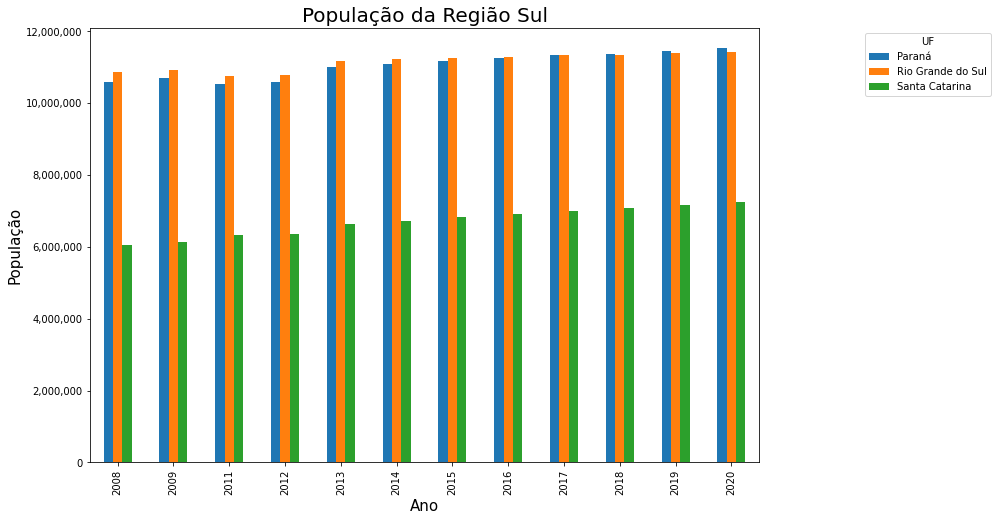

In [72]:
#plotando o gráfico da população dos três Estados da Região Sul, para uma comparação inicial

ax = populacao[["Paraná", "Rio Grande do Sul", "Santa Catarina"]].plot(kind="bar", figsize=(12,8))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #ajustando o formato dos números do eixo Y

plt.title("População da Região Sul", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("População", fontsize=15)
plt.legend(title="UF", bbox_to_anchor = (1.15, 1), frameon=True)
plt.show() 

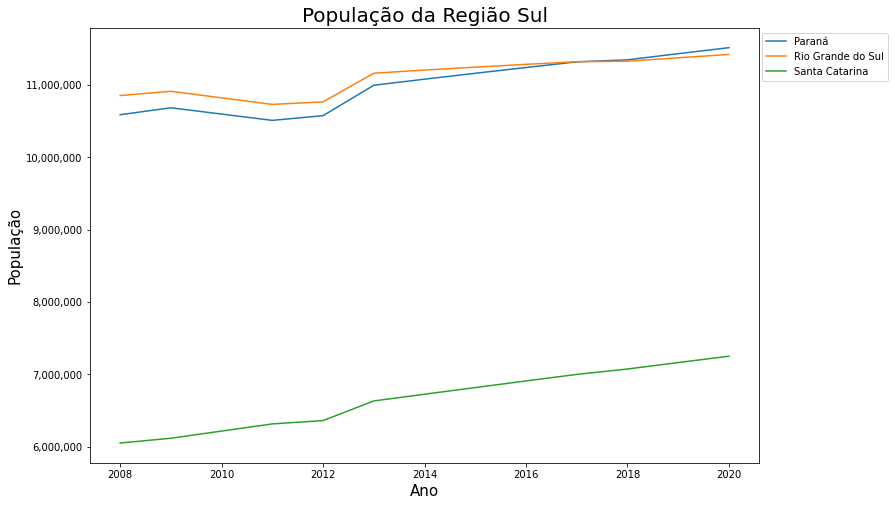

In [73]:
#plotando o gráfico da população dos três Estados da Região Sul, para uma comparação inicial

ax = populacao[["Paraná", "Rio Grande do Sul", "Santa Catarina"]].plot(figsize=(12,8))  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #ajustando o formato dos números do eixo Y

plt.title("População da Região Sul", fontsize=20)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("População", fontsize=15)
plt.legend(bbox_to_anchor = (1.20, 1), frameon=True)
plt.show() 

<p align = "justify">Com base nos dois gráficos acima, é possível verificar o crescimento populacional nos três Estados da Região Sul.</p>

<p align = "justify">Nota-se o Paraná e o Rio Grande do Sul com população muito semelhantes, além de apresentar semelhança no crescimento de habitantes.</p> 

<p align = "justify">Já o Estado de Santa Catarina é o que apresenta menor população, embora mantenha crescimento semalhante aos demais Estados foco deste análise.</p>

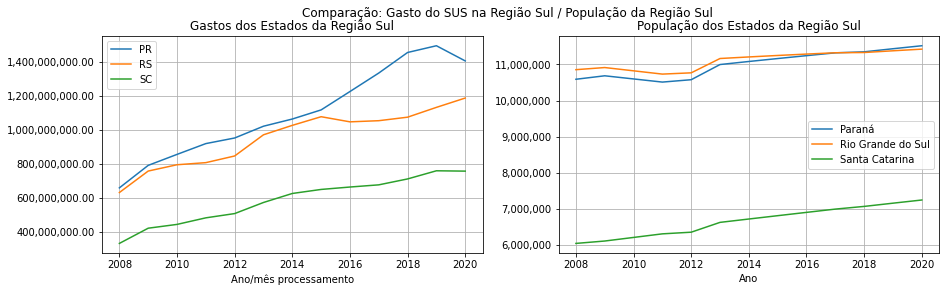

In [74]:
#gráfico comparatico entre GASTOS e POPULAÇÃO dos três Estados analisados

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

a1 = gastos_usaveis[["PR", "RS", "SC"]].plot(grid=True, ax=axs[0],
                title="Gastos dos Estados da Região Sul")

a2 = populacao[["Paraná", "Rio Grande do Sul", "Santa Catarina"]].plot(grid=True, ax=axs[1],
                title="População dos Estados da Região Sul")

a1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
a2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.suptitle("Comparação: Gasto do SUS na Região Sul / População da Região Sul", fontdict = {'fontsize' : 20})


plt.show()

<p align = "justify">Nessa primeira análise comparativa, podemos visualizar que o crescimento da população não acompanha o crescimento de gastos hospitalares, ou seja, os gastos do SUS cresceram mais do que o crescimento populacional.</p> 

<p align = "justify">Destaque para o Estado do Paraná, o qual teve grande aumento de gastos de 2015 a 2019, se comparado aos demais Estados, sendo que sua população não apresentou grandes variações nesse mesmo período.</p>

<p align = "justify">A curva que apresenta maior proporcionalidade entre o crescimento de gastos e o crescimento da população é o Estado de Santa Catarina.</p>

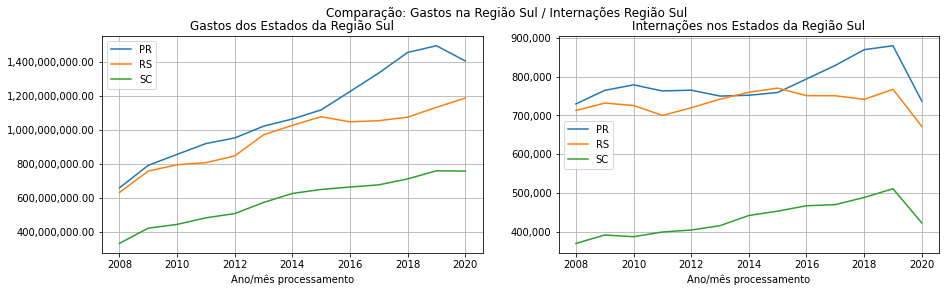

In [75]:
#gráfico comparatico entre GASTOS e INTERNAÇÕES dos três Estados analisados

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))


a1 = gastos_usaveis[["PR", "RS", "SC"]].plot(grid=True, ax=axs[0],
                title="Gastos dos Estados da Região Sul")

a2 = internacoes_usaveis[["PR", "RS", "SC"]].plot(grid=True, ax=axs[1],
                title="Internações nos Estados da Região Sul")

a1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
a2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))


plt.suptitle("Comparação: Gastos na Região Sul / Internações Região Sul", fontdict = {'fontsize' : 20})


plt.show()

<p align = "justify">Com esta segunda análise comparativa, notamos que os gastos tiveram um crescimento mais acentuado do que internações, observado em decorrência das inclinações diferenciadas das curvas, mesmo que os números guardem certa correspondência no que tange às proporções.</p>

<p align = "justify">Em resumo, constatamos que as internações acompanham os gastos, no geral, mas de maneira não linear, sofrendo certas variações no período observado, principalmente entre 2010 e 2016. 

<p align = "justify">Detalhe para o crescimento mais acentuado que ocorre com os gastos, subindo mais rapidamente do que o número de internações, no período compreendido entre 2008 e 2018. Isso pode ocorrer devido a aportes maiores no SUS por parte do Governo, ao longo destes anos. Há de se considerar também um novo governo assumindo no ano de 2018, sendo que a variação de aportes financeiros pode ser influenciada por uma política diferenciada por parte do governo que assumiu.</p> 

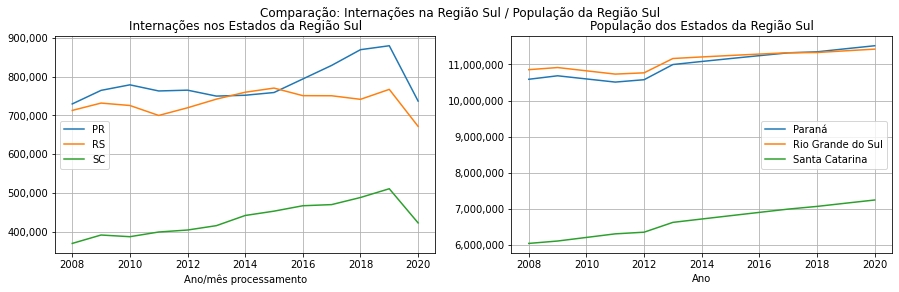

In [76]:
#gráfico comparatico entre INTERNAÇÕES e POPULAÇÃO dos três Estados analisados

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))


a1 = internacoes_usaveis[["PR", "RS", "SC"]].plot(grid=True, ax=axs[0],
                title="Internações nos Estados da Região Sul")

a2 = populacao[["Paraná", "Rio Grande do Sul", "Santa Catarina"]].plot(grid=True, ax=axs[1],
                title="População dos Estados da Região Sul")

a1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
a2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.suptitle("Comparação: Internações na Região Sul / População da Região Sul", fontdict = {'fontsize' : 20})


plt.show()

<p align = "justify">Nestes dois últimos gráficos em comparação é perceptível a proximidade entre internações e a população dos Estados, com certas variações já mencionadas anteriormente. Destaque para a queda das internações no último ano, possivelmente em decorrência da hipótese já apresentada, qual seja, a redução de leitos para o tratamento de doenças normalmente consideradas em detrimento do aumento de leitos para internações devido ao coronavírus.</p>

In [77]:
gi = internacoes_usaveis[["PR", "RS", "SC"]].T.mean()

In [78]:
g = gastos_usaveis[["PR", "RS", "SC"]].T.mean()

In [79]:
#calculando o gasto médio por internações, por ano, da Região Sul

gasto_medio = g / gi
gasto_medio

Ano/mês processamento
2008    895.76
2009   1044.00
2010   1107.44
2011   1186.33
2012   1220.79
2013   1344.71
2014   1389.96
2015   1434.29
2016   1459.04
2017   1494.72
2018   1543.25
2019   1568.67
2020   1828.32
dtype: float64

<p align = "justify">Acima, a evolução do valor da internação (considerando apenas uma estimativa, obtida com a média) ao longo dos anos, com ênfase para o último ano (2020), onde se poderia supor que o custo da internação aumentou consideravelmente, num olhar rápido. Porém, conforme já visto, isso provavelemente deve-se ao fato dos dados obtidos não computarem internações relacionadas ao covid, acarretando um número menor de internações. Sendo assim, mesmo com a evidente diminuição dos gastos, os números de internações sofreram maior queda, elevando aparentemente o custo médio de internação, o que prossivelmente não se verifica na prática, sendo o fato supostamente decorrente da falta de dados relativos a internações covid. Uma outra possível causa talvez seja a subnotificação das internações decorrentes do coronavírus. Outra ainda possível causa seria o lançamento destas internações nos dados referentes ao ano subsequentes.</p> 



---



#**Conclusões**

<p align = "justify">Embora antes de finalizar este projeto tenha sido verificado junto ao TABNET, nos dados do Datasus, a existência do Procedimento 0303010223 - TRATAMENTO DE INFECÇÃO PELO CORONAVIRUS – COVID 19, com um total de 471.124 intenações em 2020, e um total gasto de R$ 2.281.203.257,01 também em 2020 (com ambos dados relativos a todo o território brasileiro), mantemos a nossa hipótese de subnotificação das informaçoes relacionadas às internações decorrentes do coronavírus, o qual indubitavemente gerou impacto sobre o sistema de saúde brasileiro no ano de 2020 até o presente momento.</p> 

<p align = "justify">O fato dos dados analisados por meio das tabelas e gráficos acima, que apontam aumento de gastos, principalmetne no último ano, e diminuição das internações relativas principalmente aos três Estados da Região Sul hora analisados, corrobora esta conclusão, a qual ainda permanece pendente de comprovação, esta sendo possível somente mediante cruzamento sistematizado de maior número de dados e informações mais precisas relativas a forma do Sistema Único de Saúde, o SUS, computar as informações disponibilizadas no site e utilizadas nesta análise.</p>



---

